In [22]:
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

test = True

location = '/home/jakob/Project_MayaSim/Python/output_data/X5_trade/results/trajectory'
if test:
    location = '/home/jakob/Project_MayaSim/Python/output_data/test_output/X5_trade/results/traders_trajectory'
    
data = pd.read_pickle(location)
lvs = data.index.levels

cmap = mpl.cm.get_cmap('Spectral')
cls = cmap(np.linspace(0, 1, len(lvs[0])*len(lvs[1])))
print(lvs)

Populating the interactive namespace from numpy and matplotlib
[[0.0, 1.0, 2.0], [6000.0, 8000.0], [False, True], [0, 1, 2, 3, 4], ['time', 'total_agriculture_cells', 'total_income_agriculture', 'total_income_ecosystem', 'total_income_trade', 'total_migrants', 'total_population', 'total_settlements', 'total_trade_links', 'total_traders']]


/home/jakob/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [23]:
def plotlines(data, level, key, unstack):
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    key[0] = False
    data['mean_trajectories'].xs(level=level, key=key).unstack(unstack).plot(ax=ax1, legend=False, color=cls)
    ax2 = fig.add_subplot(122)
    key[0] = True
    ln = data['mean_trajectories'].xs(level=level, key=key).unstack(unstack).plot(ax=ax2, color=cls)
    lg = ln.get_legend()
    bb = lg.get_bbox_to_anchor().inverse_transformed(ax2.transAxes)
    xOffset = .5
    bb.x0 += xOffset
    bb.x1 += xOffset
    lg.set_bbox_to_anchor(bb, transform = ax2.transAxes)

In [24]:
data.head()

key                                                                        mean_trajectories  \
precip_amplitude r_trade kill_cropless timesteps observables                                   
0.0              6000.0  False         0         time                               1.000000   
                                                 total_agriculture_cells         1167.500000   
                                                 total_income_agriculture      118037.356227   
                                                 total_income_ecosystem        588938.380795   
                                                 total_income_trade             29173.422332   

key                                                                        sigma_trajectories  
precip_amplitude r_trade kill_cropless timesteps observables                                   
0.0              6000.0  False         0         time                                0.000000  
                                                 total_agriculture_cells           113.844192  
                                                 total_income_agriculture        11619.049235  
                                                 total_income_ecosystem           2837.787084  
                                                 total_income_trade               1123.338525

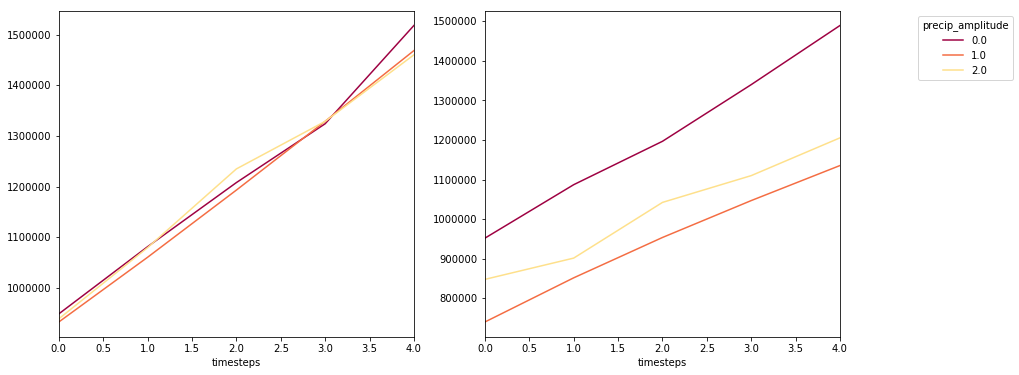

In [30]:
key=[False, 'total_population', 6000.]
level=['kill_cropless', 'observables', 'r_trade']
unstack = ['precip_amplitude']

plotlines(data, level, key, unstack)

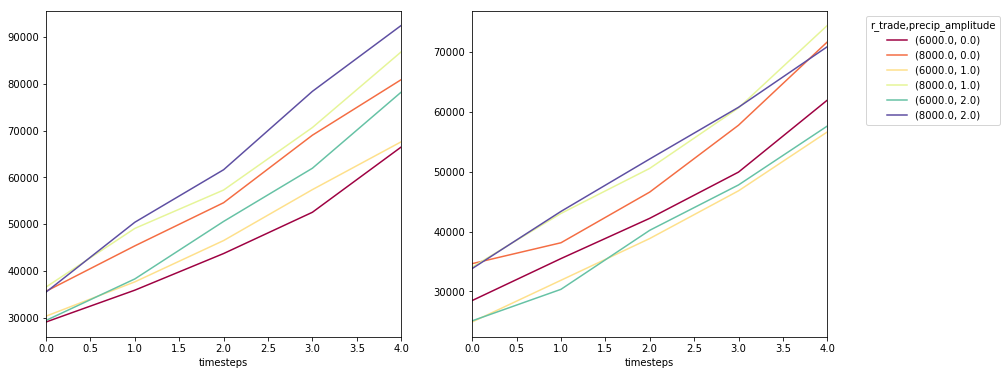

In [31]:
key=[False, 'total_income_trade']
level=['kill_cropless', 'observables']
unstack = ['r_trade', 'precip_amplitude']

plotlines(data, level, key, unstack)